<a href="https://colab.research.google.com/github/villlekorhonen/Titanic_data-analysis/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Titanic, matkustaja-analyysi**


In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/data

Mounted at /gdrive
/gdrive/MyDrive/data


In [2]:
# Tuodaan kirjastot

import pandas as pd

# Grafiikkaa varten
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

# Aineiston luonti


In [3]:
df = pd.read_excel('titanic.xlsx')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# **Miten matkustajat jakautuvat eri matkustusluokkiin?**


In [4]:
# Luodaan frekvenssitaulukko pclass-muuttujalle

# Numeroita 1, 2, 3 vastaavat luokat:
pclass = ['First class', 'Second class', 'Third class']

# Muodostetaan yksinkertainen frekvenssitaulukko:
df1 = pd.crosstab(df['pclass'], 'f')

# Poistetaan ylimääräinen otsikko:
df1.columns.name = ''

# Korvataan numerot luokkien nimillä:
df1.index = pclass

# Lisätään prosenttisarake:
n = df1['f'].sum()
df1['%'] = df1['f']/n*100

# Total-rivi:
df1.loc['Total'] = df1.sum()

df1.style.format({'f': '{:.0f}', '%': '{:.1f} %'})

,f,%
First class,323,24.7 %
Second class,277,21.2 %
Third class,709,54.2 %
Total,1309,100.0 %


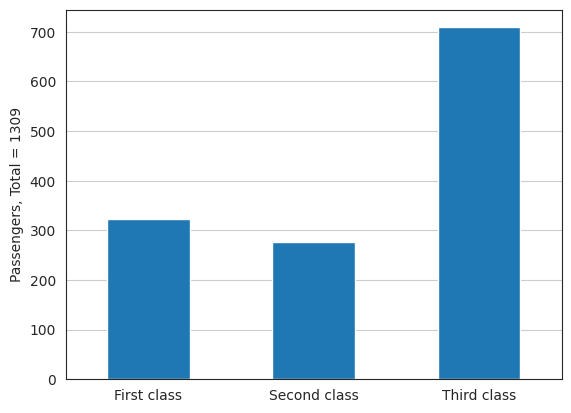

In [5]:
# Muodostetaan vastaava pylväskaavio ilman Total-riviä:

df1_classes = df1.drop('Total')
df1_classes['f'].plot(kind='bar', rot=0)
plt.ylabel(f'Passengers, Total = {n}')
plt.grid(axis='y')

# **Vastaus:** Datan perusteella on helppo päätellä, että laiva oli rakennettu siten, että varakkaammille matkustajille oli tarjolla huomattavasti paremmat matkustusolosuhteet. Yli puolet matkustajista joutui kokemaan ankeammat olosuhteet kolmannessa luokassa. Tämä kuvastaa hyvin aikakautta, jolloin ihmisten väliset statuserot ovat olleet suurempia kuin nykypäivänä.

# **Miten matkustajat jakautuivat sukupuolen mukaan?**


In [6]:
# Sukupuolta female, male vastaavat sukupuolet:
sex = ['Female', 'Male']

# Muodostetaan yksinkertainen frekvenssitaulukko

df2 = pd.crosstab(df['sex'], 's')

# Poistetaan ylimääräinen otsikko:
df2.columns.name = ''

# Korvataan sukupuolien nimet:
df2.index = sex

# Lisätään prosenttisarake:
n = df2['s'].sum()
df2['%'] = df2['s']/n*100

# Total-rivi:
df2.loc['Total'] = df2.sum()

df2.style.format({'s': '{:.0f}', '%': '{:.1f} %'})

,s,%
Female,466,35.6 %
Male,843,64.4 %
Total,1309,100.0 %


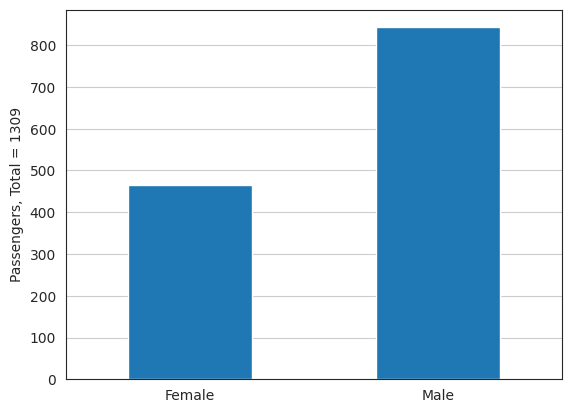

In [7]:
# Muodostetaan vastaava pylväskaavio ilman Total-riviä:

df2_sex = df2.drop('Total')
df2_sex['s'].plot(kind='bar', rot=0)
plt.ylabel(f'Passengers, Total = {n}')
plt.grid(axis='y')

In [8]:


# Sukupuolta female, male vastaavat sukupuolet:
sex = ['Female', 'Male']
# Numerot 1, 2, 3 vastaavat luokat:
pclass = ['First class', 'Second class', 'Third class']

df4 = pd.crosstab(df['sex'], df['pclass'])
df4.index = sex

# Lisää Total-rivi
df4.loc['Total'] = df4.sum()

df4.columns = pclass


df4.columns.name = 'Class'

df4.style.format('{:.0f}')

Class,First class,Second class,Third class
Female,144,106,216
Male,179,171,493
Total,323,277,709


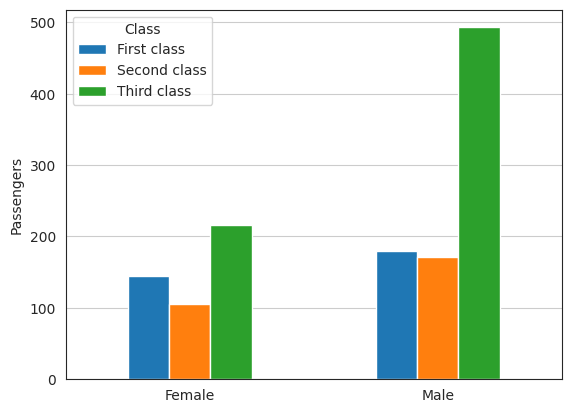

In [9]:
# Muodostetaan vastaava pylväskaavio ilman Total-riviä:

df4_sex = df4.drop('Total')
df4_sex.plot(kind='bar', rot=0)
plt.ylabel('Passengers')
plt.grid(axis='y')
plt.show()


# **Vastaus:** Data antaa hyvää kuvaa aikakauden asenteista, kuinka miesten asema oli huomattavasti parempi kuin naisten, yli 60% matkustajista oli miehiä. Neitsytmatka on ollut aikanaan varmasti haluttu kokemus. Ensimmäisen luokan tiedot kertovat, että luultavasti pariskuntia ja perheitä on matkustanut siellä. Kun taas miehiä on ollut etenkin kolmannessa luokassa paljon. Olettaisin, että monet ovat lähteneet paremman elämän perässä Amerikkaan, mikä oli myös aikakaudella tyypillistä.


# **Miten matkustajat jakautuvat iän mukaan?**


In [10]:
# Määrittelen luokkarajat iän luokittelemiseksi
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

# Lisään dataan Age range(ikähaarukka)-sarakkeen
df['Age range'] = pd.cut(df['age'], bins=bins, right=False)

# Datassa on nyt viimeisimpänä muuttujana Age range(ikähaarukka)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Age range
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","[20.0, 30.0)"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","[0.0, 10.0)"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[0.0, 10.0)"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON","[30.0, 40.0)"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[20.0, 30.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,"[10.0, 20.0)"
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,"[20.0, 30.0)"
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,"[20.0, 30.0)"


In [11]:
# Age rangeen kuuluvien frekvenssit
df5 = pd.crosstab(df['Age range'], 'f')

# Häiritsevän otsikon poistaminen
df5.columns.name = ''

# Prosentit
n = df5['f'].sum()
df5['%'] = df5['f']/n*100

# Total-rivi
df5.loc['Total'] = df5.sum()

# Tyylimäärittely: f-sarake ilman desimaaleja, %-sarakkeeseen yksi desimaali
df5.style.format({'f':'{:.0f}', '%':'{:.1f} %'})

,f,%
Age range,,
"[0, 10)",82,7.8 %
"[10, 20)",143,13.7 %
"[20, 30)",344,32.9 %
"[30, 40)",232,22.2 %
"[40, 50)",135,12.9 %
"[50, 60)",70,6.7 %
"[60, 70)",32,3.1 %
"[70, 80)",7,0.7 %
"[80, 90)",1,0.1 %


Text(0, 0.5, 'Passengers, n = 1046')

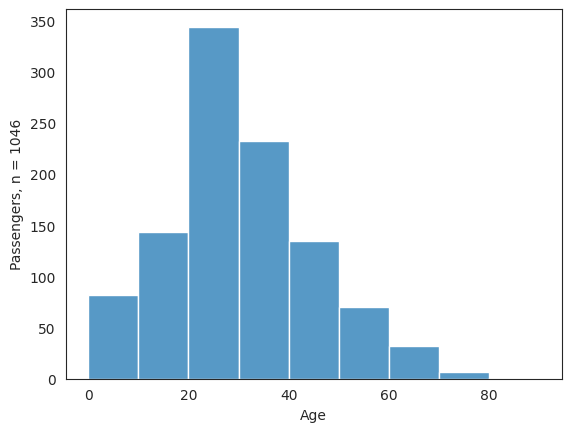

In [12]:
# Käytän histogrammissa edellä määriteltyjä luokkarajoja
sns.histplot(df['age'], bins=bins)

# Havaintojen lukumäärä
n = df['age'].count()

plt.xlabel('Age')
plt.ylabel(f'Passengers, n = {n}')

In [13]:
# Age rangeen kuuluvien frekvenssit sukupuolen mukaan
df11 = pd.crosstab(df['Age range'], df['sex'])

# Häiritsevän otsikon poistaminen
df11.columns.name = ''

# Total-rivi
df11.loc['Total'] = df11.sum()



# Tyylimäärittely: f-sarake ilman desimaaleja
df11.style.format({'female': '{:.0f}', 'male': '{:.0f}'})


,female,male
Age range,,
"[0, 10)",39,43
"[10, 20)",64,79
"[20, 30)",115,229
"[30, 40)",86,146
"[40, 50)",46,89
"[50, 60)",27,43
"[60, 70)",10,22
"[70, 80)",1,6
"[80, 90)",0,1


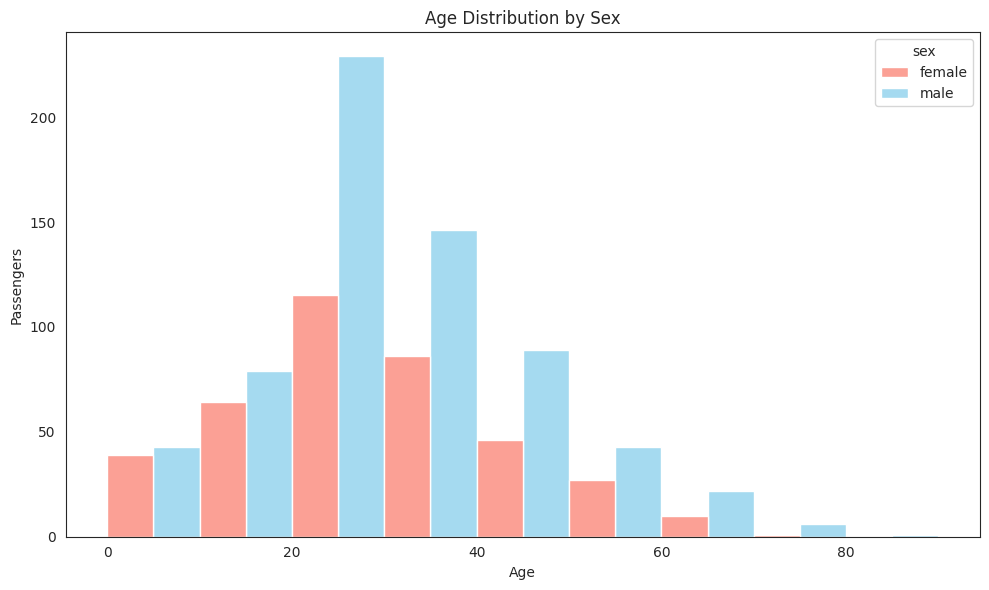

In [14]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='age', bins=bins, hue='sex', multiple='dodge', palette=['salmon', 'skyblue'], legend=True)
plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.tight_layout()
plt.show()


# **Vastaus:** On mielenkiintoista huomata, että neitsytmatkalle ovat päässeet verrattain nuoret ihmiset. Yli puolet matkustajista oli 20-40 vuotiaita. Ikäjakaumat tukevat myös edellisen vastauksen pohdintaa miesten lähtemisestä Amerikkaan paremman elämän perässä. Nuoret ja etenkin nuoret miehet ovat suuressa osassa matkustajaluetteloa. On myös hyvin erikoista modernin ajan ihmiselle, ettei kaikkien ikää tiedetä. 263 matkustajan ikää ei datasta löydy.

# **Mikä oli matkustajien keski-ikä? Mikä oli lipun keskihinta, kalleimman lipun hinta ja halvimman lipun hinta?**


In [15]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [16]:
# Tilastollisia tunnuslukuja valituille muuttujille
df7 = df[['age', 'fare']].describe()

# Suomenkieliset nimet tunnusluvuille
tunnusluvut = ['keskiarvo', 'keskihajonta', 'pienin',
             'alaneljännes', 'mediaani', 'yläneljännes', 'suurin']
df7 = df7.drop(index='count')

df7.index = tunnusluvut
df7

,age,fare
keskiarvo,29.881135,33.295479
keskihajonta,14.413500,51.758668
pienin,0.166700,0.000000
alaneljännes,21.000000,7.895800
mediaani,28.000000,14.454200
yläneljännes,39.000000,31.275000
suurin,80.000000,512.329200


In [17]:
# Edellinen transponoituna
df8 = df7.T
df8

,keskiarvo,keskihajonta,pienin,alaneljännes,mediaani,yläneljännes,suurin
age,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
fare,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292


Text(0.5, 0, 'Age')

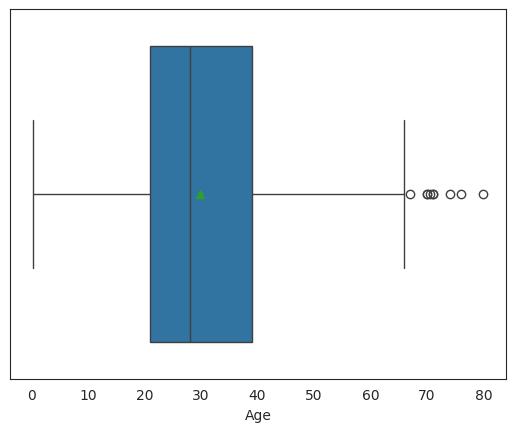

In [18]:
# Ruutu- ja janakaavio iälle
# showmeans-parametrin ansioista myös keskiarvo näytetään (vihreä kolmio)
# Erillisinä pisteinä näytetään yli 1,5 laatikon paksuuden verran laatikon
# reunasta sijaitsevat pisteet
sns.boxplot(x=df['age'], showmeans=True)



plt.xlabel(f'Age')

Text(0.5, 0, 'Price of ticket')

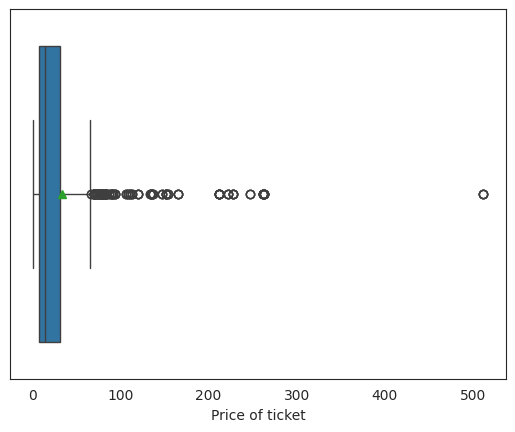

In [19]:
# Ruutu- ja janakaavio lipun hinnalle
# showmeans-parametrin ansioista myös keskiarvo näytetään (vihreä kolmio)
# Erillisinä pisteinä näytetään yli 1,5 laatikon paksuuden verran laatikon
# reunasta sijaitsevat pisteet
sns.boxplot(x=df['fare'], showmeans=True)



plt.xlabel(f'Price of ticket')

In [20]:
# Iän tunnuslukujen vertailu sukupuolen mukaan
df9 = df.groupby('sex')['age'].describe()

# Taulukon otsikot
df9.index = sex

# Tunnusluvuille suomenkieliset nimet
tunnusluvut = ['Lukumäärä', 'Keskiarvo', 'Keskihajonta', 'Pienin', 'Alaneljännes',
               'Mediaani', 'Yläneljännes', 'Suurin']
df9.columns = tunnusluvut

# Ulkoasun viimeistely
df9.style.format('{:.0f}')

,Lukumäärä,Keskiarvo,Keskihajonta,Pienin,Alaneljännes,Mediaani,Yläneljännes,Suurin
Female,388,29,15,0,19,27,38,76
Male,658,31,14,0,21,28,39,80


In [21]:
# Lipun hinnan tunnuslukujen vertailu sukupuolen mukaan
df9 = df.groupby('sex')['fare'].describe()

# Taulukon otsikot
df9.index = sex

# Tunnusluvuille suomenkieliset nimet
tunnusluvut = ['Lukumäärä', 'Keskiarvo', 'Keskihajonta', 'Pienin', 'Alaneljännes',
               'Mediaani', 'Yläneljännes', 'Suurin']
df9.columns = tunnusluvut

# Ulkoasun viimeistely
df9.style.format('{:.0f}')

,Lukumäärä,Keskiarvo,Keskihajonta,Pienin,Alaneljännes,Mediaani,Yläneljännes,Suurin
Female,466,46,63,7,11,23,55,512
Male,842,26,42,0,8,12,27,512


# **Vastaus:** Matkustajien keski-ikä on noin 29,9 vuotta. Naisten oma luku on 29 vuotta ja miesten 31 vuotta. Nuorimmat matkustajat ovat alle 1-vuotiaita. Vanhin miesmatkustaja oli 80-vuotias, hän oli samalla koko laivan vanhin matkustaja. Vanhin nainen oli 76-vuotias. Matkalipuissa lipun hinnan keskiarvo oli 33,3 puntaa. Kalleimmat liput olivat 512 puntaa ja halvimmat 7 puntaa, jos ei nollaa oteta mukaan. Naismatkustajien lipun hinnan keskiarvo oli 46 puntaa ja miesten 26 puntaa.


# **Miten menehtyneet ja selviytyneet jakautuivat hyttiluokittain?**

In [22]:


# Luo frekvenssitaulukko survived-muuttujalle
survived = ['Died', 'Survived']
# Numeroita 1, 2, 3 vastaavat luokat:
pclass = ['First class', 'Second class', 'Third class']

df6 = pd.crosstab(df['survived'], df['pclass'])
df6.index = survived

# Lisää Total-rivi
df6.loc['Total'] = df6.sum()

df6.columns = pclass
df6.columns.name = 'Class'

df6.style.format('{:.0f}')

Class,First class,Second class,Third class
Died,123,158,528
Survived,200,119,181
Total,323,277,709


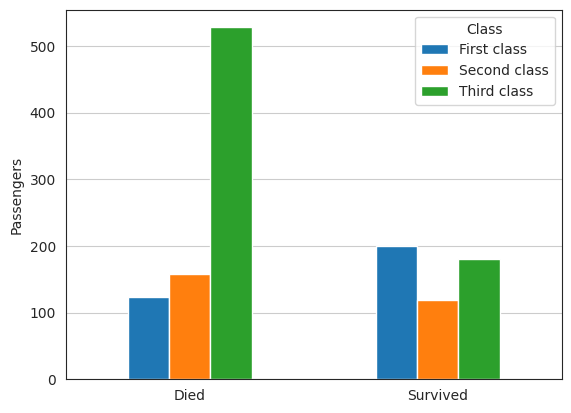

In [23]:
# Muodostetaan vastaava pylväskaavio ilman Total-riviä:

df6_survived = df6.drop('Total')
df6_survived.plot(kind='bar', rot=0)
plt.ylabel('Passengers')
plt.grid(axis='y')
plt.show()

# **Vastaus:** Kolmas hyttiluokka oli "kuoleman loukku". Suurin osa kolmannen hyttiluokan matkustajista menehtyi. Ensimmäisessä luokassa oli enemmän selviytyneitä kuin menehtyneitä. Toisessa luokassa menehtyneitä oli hieman enemmän kuin selviytyneitä.

# **Miten menehtyneet ja selvityneet jakautuivat sukupuolen sekä hyttiluokan mukaan?**

In [24]:


# Luo frekvenssitaulukko survived-muuttujalle
survived = ['Died','Survived']
sex = ['female', 'male']


df3 = pd.crosstab(df['survived'], df['sex'])
df3.index = survived

n_female = df3.loc['Survived', 'female'] + df3.loc['Died', 'female']  # Kaikkien naisten määrä
n_male = df3.loc['Survived', 'male'] + df3.loc['Died', 'male']  # Kaikkien miesten määrä

# Laske prosenttiosuus ja lisää se DataFrameen
df3.loc['Survived', '% female'] = df3.loc['Survived', 'female'] / n_female * 100
df3.loc['Died', '% female'] = df3.loc['Died', 'female'] / n_female * 100
df3.loc['Survived', '% male'] = df3.loc['Survived', 'male'] / n_male * 100
df3.loc['Died', '% male'] = df3.loc['Died', 'male'] / n_male * 100

# Sarakkeiden uudelleenjärjestely
df3 = df3.reindex(columns=['female', '% female', 'male', '% male'])
df3 = df3.rename(columns={'% female': '%', '% male': '%'})
df3.columns.name = ''

df3.style.format({'%': '{:.1f} %', '%': '{:.1f} %'})

,female,%,male,%
Died,127,27.3 %,682,80.9 %
Survived,339,72.7 %,161,19.1 %


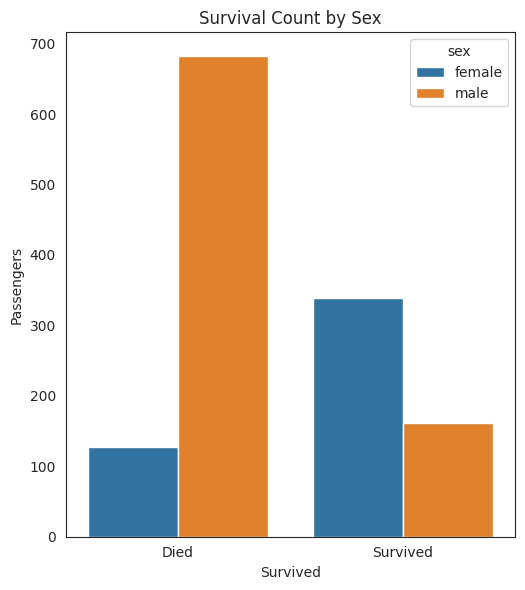

In [25]:
#
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='survived', hue='sex')
plt.title('Survival Count by Sex')
plt.ylabel('Passengers')
plt.xlabel('Survived')
plt.xticks([0, 1], ['Died', 'Survived'])


plt.tight_layout()
plt.show()

In [26]:


# Luo frekvenssitaulukko survived-muuttujalle
survived = ['Died', 'Survived']
# Numerot 1, 2, 3 vastaavat luokkia 'First class', 'Second class', 'Third class':
pclass = ['First class', 'Second class', 'Third class']
sex = ['Female', 'Male']

# Korvaa selviytymisarvot 0 ja 1 'Died' ja 'Survived' -arvoilla
df['survived'] = df['survived'].replace({0: 'Died', 1: 'Survived'})

# Luodaan frekvenssitaulukko selviytymisestä sukupuolen ja hyttiluokan mukaan
df12 = pd.crosstab(index=[df['survived'], df['sex']], columns=df['pclass'])

# Lisää rivien ja sarakkeiden nimeämiseen sopivat nimet

df12.columns = pclass
df12.columns.name = 'Class'


# Lisää Total-rivi ja Total-sarake
df12.loc[('Total', ''), :] = df12.sum()



# Ulkoasun viimeistely
df12.style.format('{:.0f}')

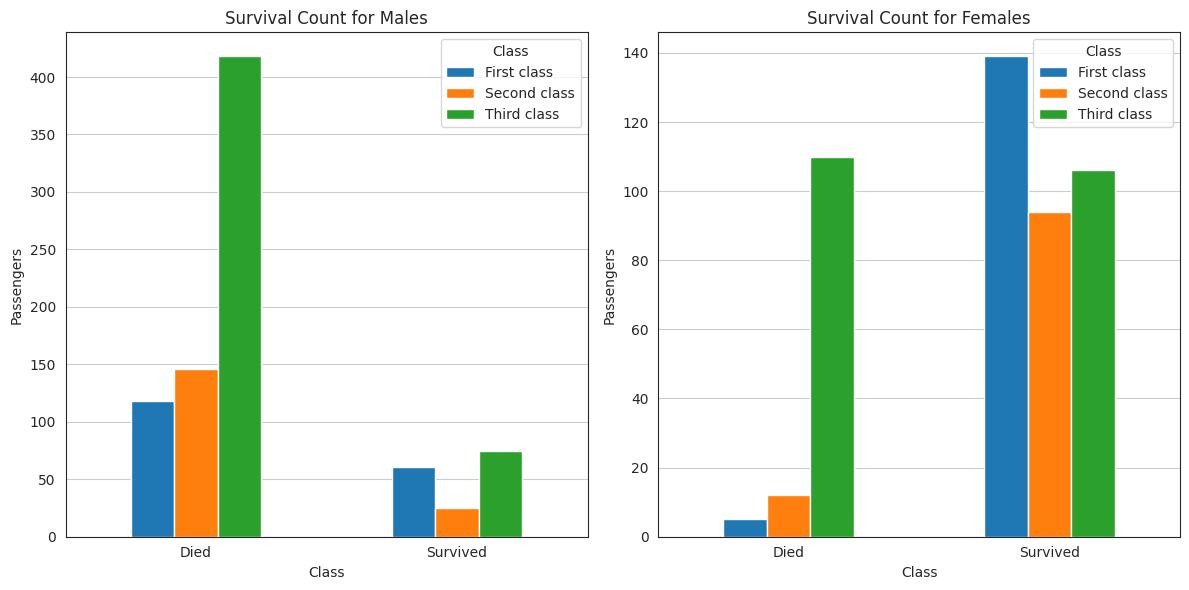

In [27]:
# Valitaan DataFramesta miesten ja naisten tiedot
df_male = df12.xs('male', level='sex')
df_female = df12.xs('female', level='sex')

# Piirretään miesten ja naisten pylväskaaviot erikseen
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df_male.plot(kind='bar', rot=0, ax=axes[0])
axes[0].set_title('Survival Count for Males')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Passengers')
axes[0].grid(axis='y')

df_female.plot(kind='bar', rot=0, ax=axes[1])
axes[1].set_title('Survival Count for Females')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Passengers')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

# **Vastaus:** Miehiä menehtyi paljon enemmän kuin naisia. Miesten selvitymisprosentti oli noin 19%, naisten vastaava oli noin 73%. Turmasta jälkeenpäin kuultuna ollut lausahdus: "Naiset ja lapset ensin" on toiminut mallikkaasti, vaikka tilanne ja olosuhteet olisivat olleet otollisia hyvinkin itsekkäälle toiminnalle. Kuten edellisessä vastauksessa käsiteltiin, oli kolmas hyttiluokka kaikkein tuhoisin. Sitä se oli myös naisille, sillä suurin osa menehtyneistä naisista matkusti kolmannessa luokassa. Tietyllä tapaa yllättävää on, että kolmannen luokan miehiä selvisi henkilömääränä eniten, selitys löytyy suuresta määrästä matkustajia siinä luokassa. Prosentuaalisesti parhaat mahdollisuudet selvitä, oli silti ensimmäisen luokan miehillä. Naisten puolelta, parhaat mahdollisuudet selvitä oli ensimmäisessä luokassa matkaavilla naisilla, vain viisi naista ensimmäisestä luokasta sai surmansa tuona yönä. Toisessa luokassa matkanneet naiset onnistuivat myös hyvällä prosentilla selviämään laivan uppoamisesta.

# **Mitä johtopäätöksiä voidaan tehdä menehtyneiden ja selvinneiden iän perusteella (Mukana vain ne joilla ikä oli merkitty)?**

In [28]:
survived = ['Died','Survived']

# Iän tunnuslukujen vertailu selvinneiden ja menehtyneiden mukaan
df10 = df.groupby('survived')['age'].describe()

# Taulukon otsikot
df10.index = survived

# Tunnusluvuille suomenkieliset nimet
tunnusluvut = ['Lukumäärä', 'Keskiarvo', 'Keskihajonta', 'Pienin', 'Alaneljännes',
               'Mediaani', 'Yläneljännes', 'Suurin']
df10.columns = tunnusluvut

# Ulkoasun viimeistely
df10.style.format('{:.0f}')

,Lukumäärä,Keskiarvo,Keskihajonta,Pienin,Alaneljännes,Mediaani,Yläneljännes,Suurin
Died,619,31,14,0,21,28,39,74
Survived,427,29,15,0,20,28,38,80


In [29]:
# Age rangeen kuuluvien frekvenssit sukupuolen mukaan
df13 = pd.crosstab(df['Age range'], df['survived'])

# Häiritsevän otsikon poistaminen
df13.columns.name = ''

# Total-rivi
df13.loc['Total'] = df13.sum()



# Tyylimäärittely: f-sarake ilman desimaaleja, %-sarakkeeseen yksi desimaali
df13.style.format({'died': '{:.0f}', 'survived': '{:.0f}'})


,Died,Survived
Age range,,
"[0, 10)",32,50
"[10, 20)",87,56
"[20, 30)",217,127
"[30, 40)",134,98
"[40, 50)",83,52
"[50, 60)",38,32
"[60, 70)",22,10
"[70, 80)",6,1
"[80, 90)",0,1


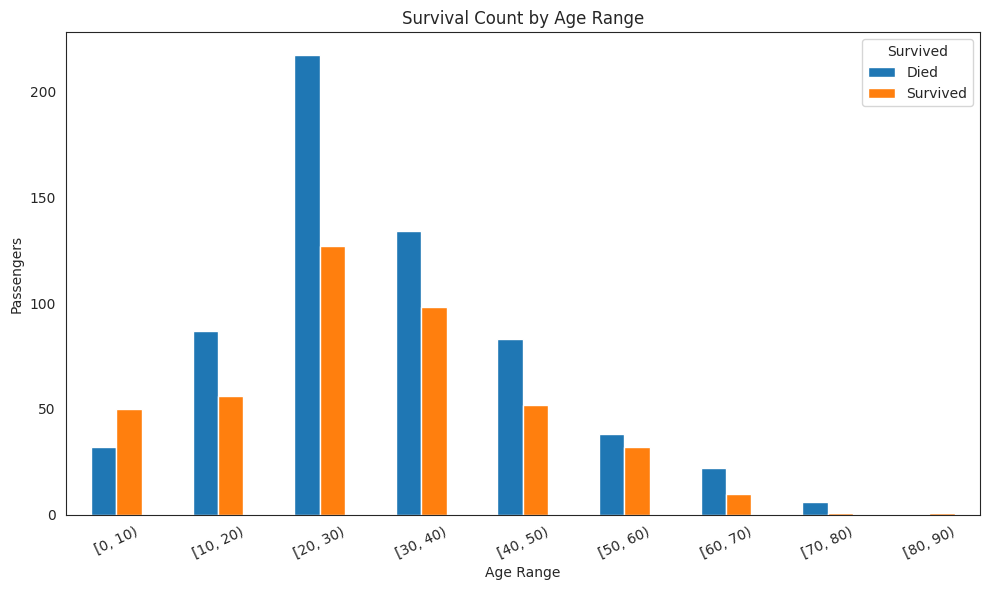

In [30]:
# Piirrä pylväskaavio
df13.drop('Total').plot(kind='bar', figsize=(10, 6))
plt.title('Survival Count by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Passengers')
plt.xticks(rotation=25)
plt.legend(title='Survived', loc='upper right')
plt.tight_layout()
plt.show()

#**Vastaus:** Kuolleissuus on koskettanut kaikkia, iästä riippumatta. Vain ikähaarukan 0-10 kohdalla, selvityneitä oli enemmän kuin menehtyneitä. Muuten kaikissa ikähaarukoissa oli menehtyneitä enemmän.